<a href="https://colab.research.google.com/github/Apurva1205/-AI-Story/blob/main/Midterm_Neural_Network_Based_Language_Model_for_Next_Token_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os


drive.mount('/content/drive')
project_dir = '/content/drive/MyDrive'

# List files
print("Files in MyDrive:")
files = os.listdir(project_dir)

#file names
for file in files:
    print(file)




Mounted at /content/drive
Files in MyDrive:
Predicting Item Prices
Post-tree Traversal .ipynb
Contour Database
Resume2023 (1).pdf
Resume2023.pdf
Colab Notebooks
CV_2023-06-28-010925.pdf
Visa slot details.gsheet
daily_purchases.csv
data.zip
MonthlySales.csv
Step1-Data Ingestion-e-commerce .ipynb
M04-Team 14_Chavan,Apurva Ravikar.ipynb
HR_Analytics.csv.csv
singular values.ipynb
Statistical Analyses 0-An Intro.ipynb
Lab-Intro to Linear Regression.ipynb
IRIS-flower-detection-team-14.ipynb
Eigen Values.ipynb
Document from ~~😎😎☺️ (4)
DC_Properties.csv
DC_Properties_Cleaned.csv
Document from ~~😎😎☺️ (3)
Document from ~~😎😎☺️ (2)
Document from ~~😎😎☺️ (1)
Document from ~~😎😎☺️
Apurva Chavan resume(24march).pdf
belarusian_cleaned.json
Iris.csv
DL Assignment 3
english_cleaned.json
belarusian_data.txt
english_cleaned.txt
cleaned_merged_data.txt
merged_data.txt


In [2]:
import torch

# GPU
if torch.cuda.is_available():
    print("GPU is available.")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available.")


GPU is not available.


# **Preprocessing**

In [3]:
# Assigned Language loading
with open('/content/drive/MyDrive/belarusian_data.txt', 'r', encoding='utf-8') as f:
    belarusian_text = f.read()

# English dataset
with open('/content/drive/MyDrive/english_cleaned.txt', 'r', encoding='utf-8') as f:
    english_text = f.read()

# Merge
merged_text = belarusian_text + '\n' + english_text

#first few lines
print("First 500 characters of merged text:")
print(merged_text[:500])

#last few lines
print("\nLast 500 characters of merged text:")
print(merged_text[-500:])

# Save
with open('/content/drive/MyDrive/merged_data.txt', 'w', encoding='utf-8') as f:
    f.write(merged_text)

print("\nMerged text saved as 'merged_data.txt'.")




First 500 characters of merged text:
 Дайце тры парады, як заставацца здаровым.
 1. Прытрымвайцеся збалансаванай і паўнавартаснай дыеты: пераканайцеся, што ваша ежа ўключае ў сябе розныя садавіна і гародніна, нятлусты бялок, суцэльнае збожжа і карысныя тлушчы. Гэта дапамагае забяспечыць ваш арганізм неабходнымі пажыўнымі рэчывамі для найлепшага функцыянавання і можа дапамагчы прадухіліць хранічныя захворванні. 2. Займайцеся рэгулярнай фізічнай актыўнасцю: практыкаванні маюць вырашальнае значэнне для падтрымання моцных костак, цяглі

Last 500 characters of merged text:
ckwards"
    },
    {
        "instruction": "Given a piece of text, you need to output whether the statements made in the text are opinions or facts. An opinion is defined as a statement that cannot be proven true or false and is usually based on someone's beliefs. A fact is defined as a statement that can be proven true or false and is not based on someone's beliefs.",
        "input": "Text: The sky was very cloudy tod

In [7]:
import re

def clean_text(text):
    # Remove non-ASCII characters
    text = ''.join([char for char in text if char.isascii()])

    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()

    # Remove numbers and special characters
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])

    return text

# Apply preprocessing to merged text
cleaned_text = clean_text(merged_text)
print(cleaned_text[:500])


                                   RGB                                                                                             Telegram Twitter Instagram     Telegram  IP Twitter Instagram Telegram                          xx                                             D D    Blender SketchUp AutoCAD D                 Liberatores                               GPS                                                                          WordVec GloVe                                      BIOS  


# **Splitting Data**

In [8]:
# Split the text into training and validation sets (e.g., 80/20 split)
split_index = int(0.8 * len(cleaned_text))
train_text = cleaned_text[:split_index]
val_text = cleaned_text[split_index:]

# Check the lengths of the splits
print(f"Training set length: {len(train_text)}")
print(f"Validation set length: {len(val_text)}")


Training set length: 35629900
Validation set length: 8907476


# **Tokenization**

In [13]:
from transformers import GPT2Tokenizer
import torch

#GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Tokenizing
tokens = tokenizer.encode(cleaned_text)

#function to clean tokens
def clean_token(token_id):
    # Decode the token
    decoded_token = tokenizer.decode([token_id], clean_up_tokenization_spaces=False)

    # Unwanted characters
    unwanted_tokens = ['�']

    # Return True if the decoded token is valid
    return decoded_token not in unwanted_tokens and decoded_token.strip() != ""


# Filter the tokens
cleaned_tokens = [token for token in tokens if clean_token(token)]

# Check the first few cleaned tokens
print(cleaned_tokens[:50])
print([tokenizer.decode([t]) for t in cleaned_tokens[:50]])

# Chunk the cleaned tokens
max_seq_length = 1024
token_chunks = [cleaned_tokens[i:i + max_seq_length] for i in range(0, len(cleaned_tokens), max_seq_length)]

# Process each cleaned chunk
for i, chunk in enumerate(token_chunks):
    print(f"Processing cleaned chunk {i+1}/{len(token_chunks)} with {len(chunk)} tokens")

    input_tensor = torch.tensor(chunk[:-1])
    target_tensor = torch.tensor(chunk[1:])




# Tokenize
tokens = tokenizer.encode(cleaned_text)


Token indices sequence length is longer than the specified maximum sequence length for this model (9021126 > 1024). Running this sequence through the model will result in indexing errors


Streaming output truncated to the last 5000 lines.
Processing cleaned chunk 2589/7588 with 1024 tokens
Processing cleaned chunk 2590/7588 with 1024 tokens
Processing cleaned chunk 2591/7588 with 1024 tokens
Processing cleaned chunk 2592/7588 with 1024 tokens
Processing cleaned chunk 2593/7588 with 1024 tokens
Processing cleaned chunk 2594/7588 with 1024 tokens
Processing cleaned chunk 2595/7588 with 1024 tokens
Processing cleaned chunk 2596/7588 with 1024 tokens
Processing cleaned chunk 2597/7588 with 1024 tokens
Processing cleaned chunk 2598/7588 with 1024 tokens
Processing cleaned chunk 2599/7588 with 1024 tokens
Processing cleaned chunk 2600/7588 with 1024 tokens
Processing cleaned chunk 2601/7588 with 1024 tokens
Processing cleaned chunk 2602/7588 with 1024 tokens
Processing cleaned chunk 2603/7588 with 1024 tokens
Processing cleaned chunk 2604/7588 with 1024 tokens
Processing cleaned chunk 2605/7588 with 1024 tokens
Processing cleaned chunk 2606/7588 with 1024 tokens
Processing cl

In [14]:
from transformers import GPT2Tokenizer
import torch

# Load GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Tokenize the text
tokens = tokenizer.encode(cleaned_text)

# sequence length
max_seq_length = 1024

# total number of tokens
print(f"Total number of tokens: {len(tokens)}")

# Chunk the tokens into smaller parts
token_chunks = [tokens[i:i + max_seq_length] for i in range(0, len(tokens), max_seq_length)]

# Process each chunk
for i, chunk in enumerate(token_chunks):
    print(f"Processing chunk {i+1}/{len(token_chunks)} with {len(chunk)} tokens")

    # Preparing the input and target tensors
    input_tensor = torch.tensor(chunk[:-1])
    target_tensor = torch.tensor(chunk[1:])


# Decode with explicit
decoded_text = tokenizer.decode(tokens[:50], clean_up_tokenization_spaces=True)


Token indices sequence length is longer than the specified maximum sequence length for this model (9021126 > 1024). Running this sequence through the model will result in indexing errors


Streaming output truncated to the last 5000 lines.
Processing chunk 3811/8810 with 1024 tokens
Processing chunk 3812/8810 with 1024 tokens
Processing chunk 3813/8810 with 1024 tokens
Processing chunk 3814/8810 with 1024 tokens
Processing chunk 3815/8810 with 1024 tokens
Processing chunk 3816/8810 with 1024 tokens
Processing chunk 3817/8810 with 1024 tokens
Processing chunk 3818/8810 with 1024 tokens
Processing chunk 3819/8810 with 1024 tokens
Processing chunk 3820/8810 with 1024 tokens
Processing chunk 3821/8810 with 1024 tokens
Processing chunk 3822/8810 with 1024 tokens
Processing chunk 3823/8810 with 1024 tokens
Processing chunk 3824/8810 with 1024 tokens
Processing chunk 3825/8810 with 1024 tokens
Processing chunk 3826/8810 with 1024 tokens
Processing chunk 3827/8810 with 1024 tokens
Processing chunk 3828/8810 with 1024 tokens
Processing chunk 3829/8810 with 1024 tokens
Processing chunk 3830/8810 with 1024 tokens
Processing chunk 3831/8810 with 1024 tokens
Processing chunk 3832/881

In [17]:
import torch
from transformers import GPT2Tokenizer

#GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

with open('/content/drive/My Drive/merged_data.txt', 'w', encoding='utf-8') as f:
    f.write(merged_text)

# Tokenize and truncate
tokens = tokenizer.encode(cleaned_text, max_length=1024, truncation=True)

# Convert token IDs into tensor format
input_tensor = torch.tensor(tokens[:-1])
target_tensor = torch.tensor(tokens[1:])

# Print
print("Input tensor shape:", input_tensor.shape)
print("Target tensor shape:", target_tensor.shape)
print("First 10 input tokens:", input_tensor[:10])
print("First 10 target tokens:", target_tensor[:10])


Input tensor shape: torch.Size([1023])
Target tensor shape: torch.Size([1023])
First 10 input tokens: tensor([220, 220, 220, 220, 220, 220, 220, 220, 220, 220])
First 10 target tokens: tensor([220, 220, 220, 220, 220, 220, 220, 220, 220, 220])


# **Creating Batches**

In [18]:
import torch

def create_batches(input_tensor, target_tensor, batch_size):
    #  number of batches
    num_batches = input_tensor.size(0) // batch_size
    # Trim the tensors
    input_tensor = input_tensor[:num_batches * batch_size]
    target_tensor = target_tensor[:num_batches * batch_size]

    # Reshape the tensors
    input_batches = input_tensor.view(num_batches, batch_size, -1)
    target_batches = target_tensor.view(num_batches, batch_size, -1)

    return input_batches, target_batches

# Example usage:
input_tensor = torch.randint(0, 50257, (63, 16))
target_tensor = torch.randint(0, 50257, (63, 16))

input_batches, target_batches = create_batches(input_tensor, target_tensor, batch_size=16)

# Print shapes
print("Input Batches Shape:", input_batches.shape)
print("Target Batches Shape:", target_batches.shape)
print("First Input Batch:\n", input_batches[0])
print("First Target Batch:\n", target_batches[0])





Input Batches Shape: torch.Size([3, 16, 16])
Target Batches Shape: torch.Size([3, 16, 16])
First Input Batch:
 tensor([[24624, 18526,  9875, 15126, 18258, 22797, 13169, 19170, 44042, 17532,
         31179, 19033, 14335, 28617, 20436, 37454],
        [46293,  5210, 36570, 25380, 46233, 23225, 20454, 15177, 42498, 30040,
         37474, 45635, 27954, 44392, 46263,  5450],
        [21010, 35094, 21409, 10145, 27813, 35350, 42825, 34759, 18187, 38935,
         32383, 21481, 32562, 43234, 31934, 30609],
        [ 2476, 40169, 13969, 37030, 33594,   799,  7158, 40061, 18713, 19507,
         36761, 22384, 43954,  4080, 38129,  3771],
        [34433,  4791, 15472,  9990, 48789, 40495, 17547, 19766, 24173, 44915,
         21775, 32009, 23115, 34957, 12582,   693],
        [14419, 22815, 33383, 31535, 12776, 43321,  5001, 24931,   814,  6652,
         42433, 30138, 39931, 28617, 48776, 23603],
        [34274, 47591, 50040, 42329,  8596, 13934, 33773, 29190, 14987, 11709,
         37065, 22462, 2

# **Training Data**

In [20]:
print(f"Max token ID: {torch.max(input_batch)}, Min token ID: {torch.min(input_batch)}")



Max token ID: 50203, Min token ID: 33


In [22]:
import torch
import torch.nn as nn
import math
import csv

# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.rnn(x)
        x = self.fc(x)
        return x

# Hyperparameters
embedding_dim = 128
hidden_dim = 256
vocab_size = 50257
learning_rate = 0.001
batch_size = 4

#the model, criterion, and optimizer
model = RNNModel(vocab_size, embedding_dim, hidden_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#training mode
model.train()

# Number of epochs
num_epochs = 1
max_batches = 10

#Generating batches from token chunks
def get_batches(token_chunks, batch_size, subset_size=500):
    token_chunks = token_chunks[:subset_size]
    for i in range(0, len(token_chunks), batch_size):
        batch_chunks = token_chunks[i:i + batch_size]
        if len(batch_chunks) == batch_size:
            input_batch = [torch.tensor(chunk[:-1]) for chunk in batch_chunks]
            target_batch = [torch.tensor(chunk[1:]) for chunk in batch_chunks]
            yield torch.stack(input_batch), torch.stack(target_batch)


results = []

# Training loop using a subset
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    total_loss = 0.0

    # Loop
    for batch_num, (input_batch, target_batch) in enumerate(get_batches(token_chunks, batch_size)):
        if batch_num >= max_batches:
            break

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(input_batch)

        # Reshape output and target for CrossEntropyLoss
        output = output.view(-1, vocab_size)  # Reshape to (batch_size * seq_len, vocab_size)
        target_batch = target_batch.view(-1)

        # Calculate the loss
        loss = criterion(output, target_batch)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Track total loss for perplexity
        total_loss += loss.item()

        # Calculate and print perplexity
        perplexity = math.exp(loss.item())
        print(f"Batch {batch_num + 1}, Loss: {loss.item()}, Perplexity: {perplexity}")

        # Save batch loss and perplexity
        results.append([epoch + 1, batch_num + 1, loss.item(), perplexity])

    # Average loss and perplexity after the epoch
    avg_loss = total_loss / max_batches
    avg_perplexity = math.exp(avg_loss)
    print(f"Epoch {epoch + 1} Average Loss: {avg_loss}, Average Perplexity: {avg_perplexity}")

# Save results to CSV
csv_file = 'Training_batch_loss_perplexity.csv'
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Epoch', 'Batch', 'Loss', 'Perplexity'])
    writer.writerows(results)

print(f"Results saved to {csv_file}")


Epoch 1/1
Batch 1, Loss: 10.91850757598877, Perplexity: 55188.372998235216
Batch 2, Loss: 9.805230140686035, Perplexity: 18128.311032346242
Batch 3, Loss: 8.870488166809082, Perplexity: 7118.755265126189
Batch 4, Loss: 7.869390487670898, Perplexity: 2615.9706358102103
Batch 5, Loss: 6.891994953155518, Perplexity: 984.3632182254407
Batch 6, Loss: 5.77579402923584, Perplexity: 322.4003283978927
Batch 7, Loss: 4.915194511413574, Perplexity: 136.34582804315835
Batch 8, Loss: 4.4363532066345215, Perplexity: 84.46634800963812
Batch 9, Loss: 3.7277770042419434, Perplexity: 41.586558590148904
Batch 10, Loss: 3.2267894744873047, Perplexity: 25.198626132694145
Epoch 1 Average Loss: 6.643751955032348, Average Perplexity: 767.9709869554638
Results saved to Training_batch_loss_perplexity.csv


# **Evaluation on Validation Set**

In [27]:
# get_batches to accept subset_size
def get_batches(token_chunks, batch_size, subset_size=500):
    token_chunks = token_chunks[:subset_size]  # Use only a subset of token chunks for faster validation
    for i in range(0, len(token_chunks), batch_size):
        batch_chunks = token_chunks[i:i + batch_size]
        if len(batch_chunks) == batch_size:
            input_batch = [torch.tensor(chunk[:-1]) for chunk in batch_chunks]
            target_batch = [torch.tensor(chunk[1:]) for chunk in batch_chunks]
            yield torch.stack(input_batch), torch.stack(target_batch)

# Validation function
def validate(model, token_chunks, batch_size, subset_size=500, max_batches=10):
    total_loss = 0.0
    total_batches = 0
    results = []


    with torch.no_grad():
        for batch_num, (input_batch, target_batch) in enumerate(get_batches(token_chunks, batch_size, subset_size)):
            if batch_num >= max_batches:  # Stop after 10 batches
                break

            # Forward pass
            output = model(input_batch)

            # Reshape output and target for CrossEntropyLoss
            output = output.view(-1, vocab_size)
            target_batch = target_batch.view(-1)

            # Calculate the loss
            loss = criterion(output, target_batch)
            total_loss += loss.item()

            # Calculate perplexity
            perplexity = math.exp(loss.item())
            results.append([batch_num + 1, loss.item(), perplexity])

            total_batches += 1

    # Average loss and perplexity
    avg_loss = total_loss / total_batches
    avg_perplexity = math.exp(avg_loss)
    print(f"Validation Loss: {avg_loss}, Validation Perplexity: {avg_perplexity}")

    return results, avg_loss, avg_perplexity

#  validation set
validation_results, val_loss, val_perplexity = validate(model, val_token_chunks, batch_size, subset_size=500, max_batches=10)

# Saving validation results to a CSV file
csv_file = 'Validation_batch_loss_perplexity.csv'
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Batch', 'Loss', 'Perplexity'])
    writer.writerows(validation_results)

print(f"Validation results saved to {csv_file}")



Validation Loss: 10.282915306091308, Validation Perplexity: 29228.960833103603
Validation results saved to Validation_batch_loss_perplexity.csv


# **Loss Training curve**

In [30]:
import torch
import torch.nn as nn
import math
import csv
import matplotlib.pyplot as plt

# Lists to store loss for plotting
training_losses = []
validation_losses = []

# Training loop using a subset
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    total_loss = 0.0

    # Loop through the batches
    for batch_num, (input_batch, target_batch) in enumerate(get_batches(token_chunks, batch_size)):
        if batch_num >= max_batches:
            break

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(input_batch)

        # Reshape output and target for CrossEntropyLoss
        output = output.view(-1, vocab_size)
        target_batch = target_batch.view(-1)

        # Calculate the loss
        loss = criterion(output, target_batch)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Track total loss for perplexity
        total_loss += loss.item()

    # Average loss after the epoch
    avg_loss = total_loss / max_batches
    training_losses.append(avg_loss)
    print(f"Epoch {epoch + 1} Average Training Loss: {avg_loss}")

    # Validate the model at the end of each epoch
    validation_results, val_loss, val_perplexity = validate(model, val_token_chunks, batch_size, subset_size=500, max_batches=10)
    validation_losses.append(val_loss)
    print(f"Epoch {epoch + 1} Validation Loss: {val_loss}, Validation Perplexity: {val_perplexity}")

# Save results to CSV
csv_file = 'Training_Validation_Loss.csv'
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Epoch', 'Training Loss', 'Validation Loss'])
    for i in range(num_epochs):
        writer.writerow([i + 1, training_losses[i], validation_losses[i]])

print(f"Results saved to {csv_file}")


Epoch 1/1
Epoch 1 Average Training Loss: 1.6828937649726867
Validation Loss: 12.41022710800171, Validation Perplexity: 245297.5170258998
Epoch 1 Validation Loss: 12.41022710800171, Validation Perplexity: 245297.5170258998
Results saved to Training_Validation_Loss.csv


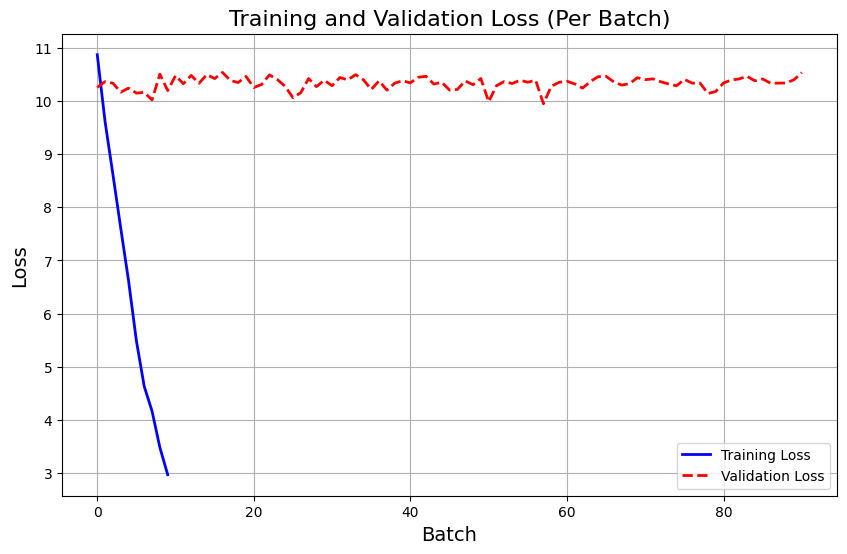

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `training_losses` and `validation_losses` contain the loss values per batch
# Training and validation loss are tracked during the training and validation processes.

# Plotting training and validation loss curves
plt.figure(figsize=(10, 6))

# Plot training loss as a line (no markers)
plt.plot(np.arange(len(training_losses)), training_losses, label='Training Loss', color='blue', linestyle='-', linewidth=2)

# Plot validation loss as a line (no markers)
plt.plot(np.arange(len(validation_losses)), validation_losses, label='Validation Loss', color='red', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('Batch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training and Validation Loss (Per Batch)', fontsize=16)
plt.legend(loc='best')

# Display grid and show the plot
plt.grid(True)
plt.show()


# **Checkpoints**

In [39]:
import torch
import torch.nn as nn
import math

max_batches = 10  # Limit to 10 batches

# Training loop with checkpoint and max_batches
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    total_loss = 0.0  # Track training loss

    for batch_num, (input_batch, target_batch) in enumerate(get_batches(token_chunks, batch_size)):
        if batch_num >= max_batches:
            break

        optimizer.zero_grad()  # Reset gradients
        output = model(input_batch)  # Forward pass
        output = output.view(-1, vocab_size)  # Reshape for loss calculation
        target_batch = target_batch.view(-1)

        loss = criterion(output, target_batch)  # Compute loss
        loss.backward()  # Backpropagate loss
        optimizer.step()  # Update model parameters

        total_loss += loss.item()  # Accumulate loss

        if batch_num % 10 == 0:
            perplexity = math.exp(loss.item())  # Compute perplexity
            print(f"Batch {batch_num + 1}, Loss: {loss.item()}, Perplexity: {perplexity}")

        # Save a checkpoint after every batch
        checkpoint_path = f"model_checkpoint_epoch{epoch + 1}_batch{batch_num + 1}.pt"
        torch.save(model.state_dict(), checkpoint_path)
        print(f"Checkpoint saved at {checkpoint_path}")

    avg_loss = total_loss / max_batches  # Compute average training loss
    avg_perplexity = math.exp(avg_loss)  # Compute average perplexity
    print(f"Epoch {epoch + 1} Average Loss: {avg_loss}, Average Perplexity: {avg_perplexity}")

# Validation loop with cumulative loss and perplexity
validation_total_loss = 0.0  # Initialize validation loss
for batch_num, (input_batch, target_batch) in enumerate(get_batches(val_token_chunks, batch_size)):
    if batch_num >= max_batches:  # Stop after 10 batches
        break

    with torch.no_grad():  # Disable gradient calculation for validation
        output = model(input_batch)  # Forward pass for validation
        output = output.view(-1, vocab_size)
        target_batch = target_batch.view(-1)

        val_loss = criterion(output, target_batch)  # Compute validation loss
        validation_total_loss += val_loss.item()  # Accumulate validation loss

        val_perplexity = math.exp(val_loss.item())  # Compute validation perplexity
        print(f"Validation Batch {batch_num + 1}, Loss: {val_loss.item()}, Perplexity: {val_perplexity}")

# Compute and print average validation loss and perplexity
avg_val_loss = validation_total_loss / max_batches
avg_val_perplexity = math.exp(avg_val_loss)
print(f"Validation Average Loss: {avg_val_loss}, Average Perplexity: {avg_val_perplexity}")










Epoch 1/1
Batch 1, Loss: 1.9285662174224854, Perplexity: 6.8796392599410625
Checkpoint saved at model_checkpoint_epoch1_batch1.pt
Checkpoint saved at model_checkpoint_epoch1_batch2.pt
Checkpoint saved at model_checkpoint_epoch1_batch3.pt
Checkpoint saved at model_checkpoint_epoch1_batch4.pt
Checkpoint saved at model_checkpoint_epoch1_batch5.pt
Checkpoint saved at model_checkpoint_epoch1_batch6.pt
Checkpoint saved at model_checkpoint_epoch1_batch7.pt
Checkpoint saved at model_checkpoint_epoch1_batch8.pt
Checkpoint saved at model_checkpoint_epoch1_batch9.pt
Checkpoint saved at model_checkpoint_epoch1_batch10.pt
Epoch 1 Average Loss: 1.360168981552124, Average Perplexity: 3.8968517422173026
Validation Batch 1, Loss: 9.879148483276367, Perplexity: 19519.094747988678
Validation Batch 2, Loss: 9.940988540649414, Perplexity: 20764.260459068
Validation Batch 3, Loss: 9.977396011352539, Perplexity: 21534.16475676634
Validation Batch 4, Loss: 9.917908668518066, Perplexity: 20290.5120387774
Valid

## **Checking Model Outputs**

In [43]:
# Check if cleaned_text is empty
if not cleaned_text:
    raise ValueError("The input text is empty.")

# Tokenize the text
tokens = tokenizer.encode(cleaned_text)

# sequence length
max_seq_length = 1024

# total number of tokens
print(f"Total number of tokens: {len(tokens)}")

# Chunk the tokens into smaller parts
token_chunks = [tokens[i:i + max_seq_length] for i in range(0, len(tokens), max_seq_length)]

# Process each chunk
for i, chunk in enumerate(token_chunks):
    print(f"Processing chunk {i+1}/{len(token_chunks)} with {len(chunk)} tokens")

    # Preparing the input and target tensors
    input_tensor = torch.tensor(chunk[:-1]) if len(chunk) > 1 else torch.tensor([])
    target_tensor = torch.tensor(chunk[1:]) if len(chunk) > 1 else torch.tensor([])



Token indices sequence length is longer than the specified maximum sequence length for this model (9021126 > 1024). Running this sequence through the model will result in indexing errors


Streaming output truncated to the last 5000 lines.
Processing chunk 3811/8810 with 1024 tokens
Processing chunk 3812/8810 with 1024 tokens
Processing chunk 3813/8810 with 1024 tokens
Processing chunk 3814/8810 with 1024 tokens
Processing chunk 3815/8810 with 1024 tokens
Processing chunk 3816/8810 with 1024 tokens
Processing chunk 3817/8810 with 1024 tokens
Processing chunk 3818/8810 with 1024 tokens
Processing chunk 3819/8810 with 1024 tokens
Processing chunk 3820/8810 with 1024 tokens
Processing chunk 3821/8810 with 1024 tokens
Processing chunk 3822/8810 with 1024 tokens
Processing chunk 3823/8810 with 1024 tokens
Processing chunk 3824/8810 with 1024 tokens
Processing chunk 3825/8810 with 1024 tokens
Processing chunk 3826/8810 with 1024 tokens
Processing chunk 3827/8810 with 1024 tokens
Processing chunk 3828/8810 with 1024 tokens
Processing chunk 3829/8810 with 1024 tokens
Processing chunk 3830/8810 with 1024 tokens
Processing chunk 3831/8810 with 1024 tokens
Processing chunk 3832/881

In [71]:
import torch

def generate_text(model, start_sequence, max_length=50):
    model.eval()  # Set the model to evaluation mode
    generated = start_sequence.copy()  # Start with the given sequence

    # Generate tokens one by one
    for _ in range(max_length):
        input_tensor = torch.tensor(generated).unsqueeze(0)  # Add batch dimension
        with torch.no_grad():  # No need to calculate gradients
            output = model(input_tensor)  # Forward pass

        # Get the last token's logits and apply softmax to get probabilities
        logits = output[:, -1, :]  # Take the last output
        probabilities = torch.softmax(logits, dim=-1)  # Convert logits to probabilities

        # Sample from the distribution or choose the token with the highest probability
        next_token = torch.multinomial(probabilities, num_samples=1).item()  # Sample from the distribution
        generated.append(next_token)  # Append the generated token

    return generated


In [72]:
import torch
from transformers import GPT2Tokenizer
import random

# Load GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Tokenize the starting phrase
starting_phrase = "once upon a time"
starting_tokens = tokenizer.encode(starting_phrase)

# Load Belarusian dataset
with open('/content/drive/MyDrive/belarusian_data.txt', 'r', encoding='utf-8') as f:
    belarusian_text = f.read()

# Split the text into sentences
belarusian_sentences = belarusian_text.split('\n')

# Randomly select a Belarusian phrase
random_belarusian_sentence = random.choice(belarusian_sentences).strip()
belarusian_tokens = tokenizer.encode(random_belarusian_sentence)

# Combine starting tokens and the randomly chosen Belarusian tokens
start_sequence = starting_tokens + belarusian_tokens

# Check if the total length
max_length = 1024
if len(start_sequence) > max_length:
    start_sequence = start_sequence[-max_length:]

# Define the text generation function
def generate_text(model, start_sequence, max_length=50):
    model.eval()  # Set the model to evaluation mode
    generated = start_sequence.copy()

    # Convert start sequence to tensor
    input_tensor = torch.tensor(generated).unsqueeze(0)
    with torch.no_grad():
        for _ in range(max_length):
            output = model(input_tensor)
            next_token = torch.argmax(output[:, -1, :], dim=-1)
            generated.append(next_token.item())

            # Update input_tensor for next prediction
            input_tensor = torch.cat((input_tensor, next_token.unsqueeze(0)), dim=1)

            # Truncate input tensor if it exceeds max length
            if input_tensor.size(1) > max_length:
                input_tensor = input_tensor[:, -max_length:]

    return generated

# Generate text with the model
generated_tokens = generate_text(model, start_sequence)

# Decode the generated tokens back to text
decoded_text = tokenizer.decode(generated_tokens, skip_special_tokens=True)
print("Generated Text:", decoded_text)



Token indices sequence length is longer than the specified maximum sequence length for this model (2038 > 1024). Running this sequence through the model will result in indexing errors


Generated Text: �эманструе вернасць сваім прынцыпам. Ён рызыкуе сваёй рэпутацыяй і бяспекай сваёй сям'і, абараняючы Тома Робінсана, і вучыць сваіх дзяцей адстойваць свае перакананні, нават калі гэта цяжка ці непапулярна. Ён кажа ім: «Я хацеў, каб вы ўбачылі, што такое сапраўдная мужнасць… гэта калі вы ведаеце, што вас аблізалі, перш чым пачаць, але вы ўсё роўна пачынаеце і дажываеце да канца, нягледзячы ні на што». Кальпурнія, ахмістрыня сям'і Фінчаў, таксама дэманструе вернасць у сваім доглядзе за дзецьмі Фінчаў і намаганнях навучыць іх важнасці справядлівага абыходжання з усімі людзьмі, незалежна ад іх сацыяльнага становішча або расы. Увогуле, у «Забіць перасмешніка» вернасць падаецца як важная цнота. Вернасць герояў выпрабоўваецца на працягу ўсяго рамана, і тыя, хто застаецца верным сваім прынцыпам, і іх блізкія намаляваны як гераічныя і вартыя захаплення.                                                  


In [87]:
import random
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch

# Load GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Tokenize the starting phrase
starting_phrase = "In a quiet village"
starting_tokens = tokenizer.encode(starting_phrase)

# Define a list of possible Belarusian sentence prompts
belarusian_prompts = [
    "жыла маленькая дзяўчынка,",  # "There lived a little girl,"
    "жыла старая бабуля,",  # "There lived an old grandmother,"
    "аднойчы ў лесе,",  # "Once in the forest,"
]

# Define the function to generate a random Belarusian sentence
def generate_random_belarusian(model, start_sequence, max_length=30, temperature=0.7, top_k=50):
    # Randomly select a Belarusian phrase
    initial_belarusian_prompt = random.choice(belarusian_prompts)
    belarusian_tokens = tokenizer.encode(initial_belarusian_prompt)

    # Combine starting tokens and the Belarusian tokens
    combined_start_sequence = start_sequence + belarusian_tokens

    # Generate text
    model.eval()  # Set the model to evaluation mode
    generated = combined_start_sequence.copy()

    # Convert start sequence to tensor
    input_tensor = torch.tensor(generated).unsqueeze(0).to(device)  # Add batch dimension

    with torch.no_grad():
        for _ in range(max_length):
            output = model(input_tensor)
            logits = output.logits[:, -1, :]  # Get the logits for the last token

            # Apply temperature and top-k sampling
            logits = logits / temperature
            top_k_values, top_k_indices = torch.topk(logits, top_k)
            probabilities = torch.softmax(top_k_values, dim=-1)
            next_token_idx = random.choices(top_k_indices[0].tolist(), weights=probabilities[0].tolist(), k=1)[0]

            generated.append(next_token_idx)  # Add the predicted token to the generated list

            # Update input_tensor for next prediction
            input_tensor = torch.cat((input_tensor, torch.tensor([[next_token_idx]]).to(device)), dim=1)

    return generated

# Define the text generation function
def generate_text(model, start_sequence, max_length=50):
    return generate_random_belarusian(model, start_sequence, max_length)

# Generate text with the model
generated_tokens = generate_text(model, starting_tokens)

# Decode the generated tokens back to text
decoded_text = tokenizer.decode(generated_tokens, skip_special_tokens=True)
print("Generated Text:", decoded_text)



Generated Text: In a quiet villageжыла старая бабуля, a man named Filippo says he has been making his way through the city for nearly two months. He has to drive for five kilometers, but he gets it.

Filippo, who is based in the city centre, says he
